In [1]:
# read the csv files 
import pandas as pd
import sys, os, re, glob
import numpy as np

import os.path
from os import path

from scipy.interpolate import splev, splrep
from scipy.optimize import curve_fit
from lmfit import Model 
from iminuit import Minuit

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from matplotlib import pylab

import seaborn as sns



In [2]:
dtsetpaths = open('datafiles.txt', 'r')

pic=[]
label=[]
for line in dtsetpaths :
    line=line.strip()
    label.append(re.findall('[0-9]+p[0-9]+',line)) # label the [current,voltage]
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))

#print(label)
picdiff_ref=[]
picdiff_sec=[]

for i in range(0,len(pic)):  #calculate subtraction of pictures
    picdiff_ref.append(pic[i]- pic[0])
    picdiff_sec.append(pic[i]- pic[i-1])

for i in range(0,len(picdiff_ref)): #save subtractions in csv files 
    np.savetxt("./data/sbt_ref-%s-%s.csv"%(label[i][0],label[0][0]), np.asarray(picdiff_ref[i]), delimiter=",")
    np.savetxt("./data/sbt_sec-%s-%s.csv"%(label[i][0],label[i-1][0]), np.asarray(picdiff_sec[i]), delimiter=",")
    
    

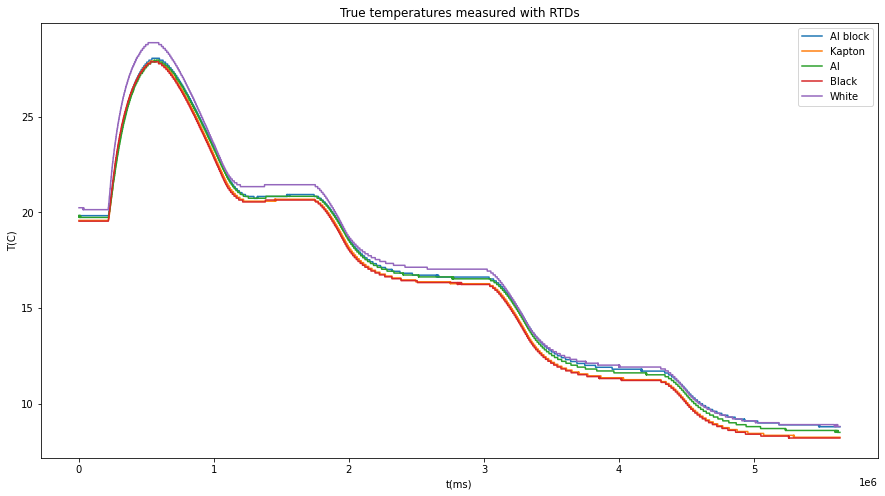

In [3]:
# Now we want to explore the chance to eliminate emissivity effect by using different surfaces
# We prepared an Al block with 4 types of tapes; each tape has attached an RTD to measure the true Temperature.

#RTDs signals plot

Temp = pd.read_csv("./08_31_2020_19_17_10/test.csv",sep=",", index_col=None) # read info from csv file

t=Temp.t_msec # time from start in ms 
T_ab=Temp.RTD_10 # T on Al block
T_kt=Temp.RTD_11 # T kapton tape
T_at=Temp.RTD_1 # T Al tape
T_bt=Temp.RTD_20 # T black tape
T_wt=Temp.RTD_12 # T white tape

plt.figure(figsize=(15,8))
plt.xlabel("t(ms)")
plt.ylabel("T(C)")
plt.title('True temperatures measured with RTDs')
plt.plot(t, T_ab)
plt.plot(t, T_kt)
plt.plot(t, T_at)
plt.plot(t, T_bt)
plt.plot(t, T_wt)

plt.legend(["Al block", "Kapton","Al ", "Black", "White"])

plt.show()


In [4]:
# now the picture subtraction

dft = open('datafilestapes.txt', 'r')

pic=[]
label=[]
for line in dft:
    #print(line) 
    line=line.strip()
    label.append(re.findall('T_[0-9]+',line)) # label the file name (approx true temp)  
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))
    
picdiff_ref=[]
picdiff_sec=[]

for i in range(0,len(pic)):  #calculate subtraction of pictures
    picdiff_ref.append(pic[i]- pic[0])
    picdiff_sec.append(pic[i]- pic[i-1])
        
for i in range(0,len(picdiff_ref)): #save subtractions in csv files 
    np.savetxt("./2020Aug31_tapes/sbt_ref-%s-%s.csv"%(label[i][0],label[0][0]), np.asarray(picdiff_ref[i]), delimiter=",")
    np.savetxt("./2020Aug31_tapes/sbt_sec-%s-%s.csv"%(label[i][0],label[i-1][0]), np.asarray(picdiff_sec[i]), delimiter=",")
    


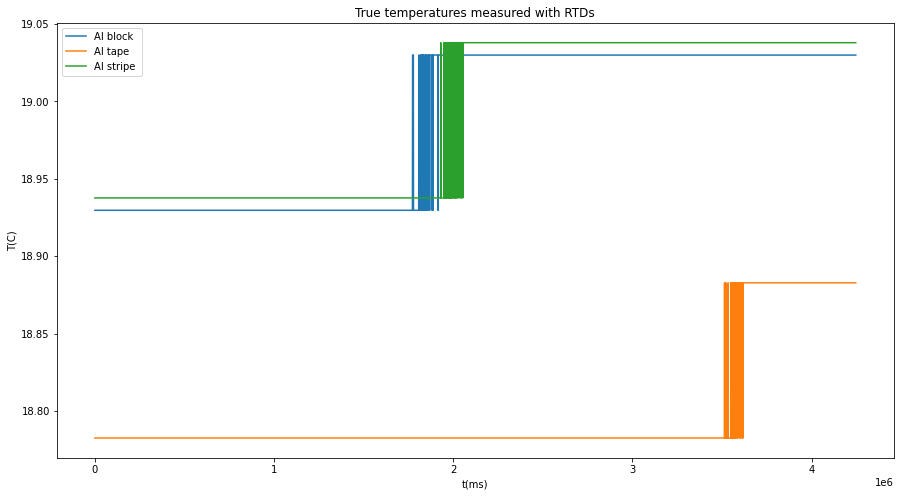

In [5]:
# We want correct for the Temperature reading error due to the heat generated by the camera itself
# which appears in the images as a background heat. We expect the camera to reach a stable temperature after some
# estabilization time; finding it, we will be able to wait until the camera is fully warmed before start taking data
# and correct the measurements by image subtraction.

#RTDs signals plot
# Note that T is constant in time, therefore any change in T is due to the IR camera. 


Temp_irc = pd.read_csv("./09_08_2020_11_41_39/test.csv",sep=",", index_col=None) # read info from csv file

t=Temp_irc.t_msec # time from start in ms 
T_ab=Temp_irc.RTD_10 # T on Al block
T_at=Temp_irc.RTD_11 # T Al tape
T_ats=Temp_irc.RTD_1 # T Al tape stripe

plt.figure(figsize=(15,8))
plt.xlabel("t(ms)")
plt.ylabel("T(C)")
plt.title('True temperatures measured with RTDs')
plt.plot(t, T_ab)
plt.plot(t, T_at)
plt.plot(t, T_ats)

plt.legend(["Al block", "Al tape","Al stripe "])

plt.show()



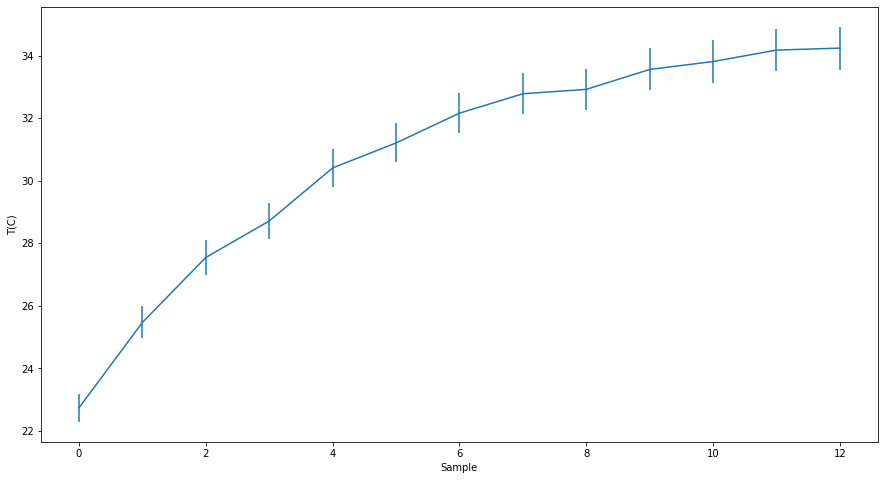

In [6]:
# Now the Tmax and stabilization time identification. Pictures were taken ~ once per minute 

dft = open('datafileslens.txt', 'r')

pic=[]
label=[]
for line in dft:
    #print(line) 
    line=line.strip()
    label.append(re.findall('Tlens[0-9]+',line)) # label the file name (# of picture)  
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))

Tmax=[]

for i in range(0,len(pic)): 
    idx, idy =np.where(pic[i] == np.amax(pic[i]))
    Tmax.append([i,np.amax(pic[i]),idx[0],idy[0]])
    
    
dfT=pd.DataFrame(Tmax,columns= ['Sample','Tmax','px','py'])

yerr=dfT.Tmax*0.02            # E50 camera has an accuracy of +-2% of the reading (or 2 C) 
plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample, dfT.Tmax,yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax    


In [8]:
#No stabilization, thus we need to take more data

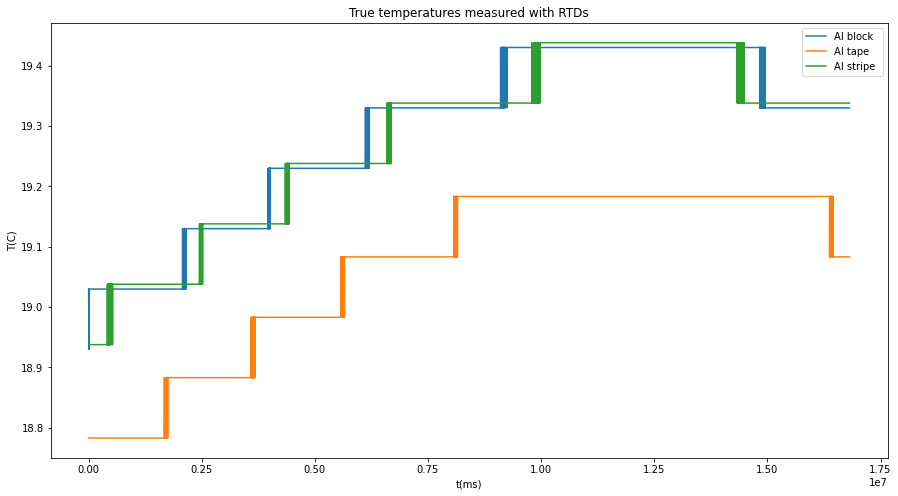

In [9]:
#RTDs signals plot
# Note that where T is constant in time, any change in T is due to the IR camera. 


Temp_irc = pd.read_csv("./09_10_2020_17_06_10/test.csv",sep=",", index_col=None) # read info from csv file

t=Temp_irc.t_msec # time from start in ms 
T_ab=Temp_irc.RTD_10 # T on Al block
T_at=Temp_irc.RTD_11 # T Al tape
T_ats=Temp_irc.RTD_1 # T Al tape stripe

plt.figure(figsize=(15,8))
plt.xlabel("t(ms)")
plt.ylabel("T(C)")
plt.title('True temperatures measured with RTDs')
plt.plot(t, T_ab)
plt.plot(t, T_at)
plt.plot(t, T_ats)

plt.legend(["Al block", "Al tape","Al stripe "])

plt.show()

In [10]:
# Now the Tmax and stabilization time identification: longer data taking. Pictures were taken ~ once per minute 

dft = open('datafileslens_sep10.txt', 'r')

pic=[]
label=[]
for line in dft:
    #print(line) 
    line=line.strip()
    label.append(re.findall('Tlens[0-9]+',line)) # label the file name (# of picture)  
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))
    

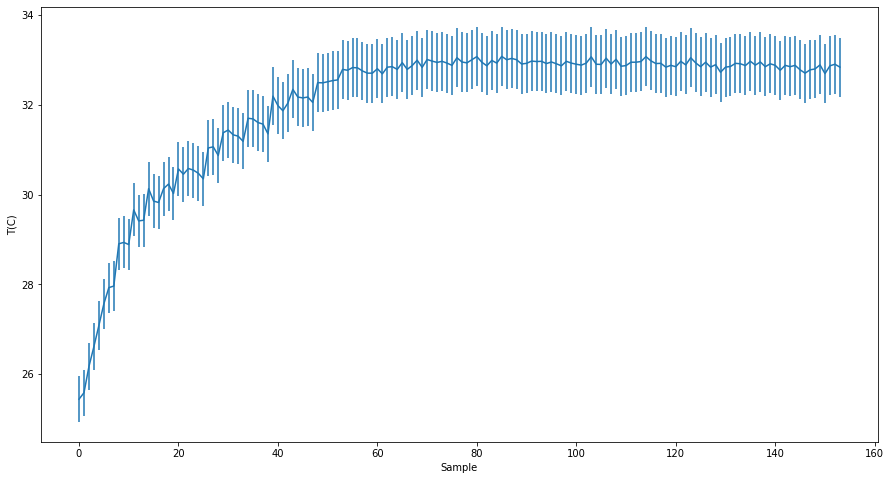

In [11]:

Tmax=[]

for i in range(0,len(pic)): 
    idx, idy =np.where(pic[i] == np.amax(pic[i]))
    Tmax.append([i,np.amax(pic[i]),idx[0],idy[0]])
    
    
dfT=pd.DataFrame(Tmax,columns= ['Sample','Tmax','px','py'])

yerr=dfT.Tmax*0.02            # E50 camera has an accuracy of +-2% of the reading (or 2 C) 
plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample, dfT.Tmax,yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax

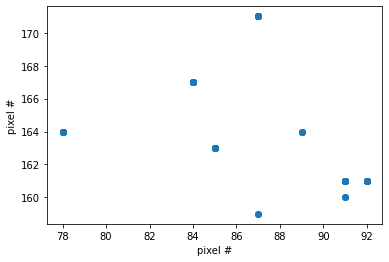

0      91
1      91
2      85
3      85
4      85
       ..
149    92
150    92
151    92
152    92
153    92
Name: px, Length: 154, dtype: int64 0      160
1      160
2      163
3      163
4      163
      ... 
149    161
150    161
151    161
152    161
153    161
Name: py, Length: 154, dtype: int64


In [12]:
plt.scatter(dfT.px,dfT.py)
#plt.plot(dfT2.idx,dfT2.py)
plt.xlabel('pixel #')
plt.ylabel('pixel #')
plt.show()
print(dfT.px,dfT.py) 

Tmax= 32.91742857142857 +/- 0.07950150195054441


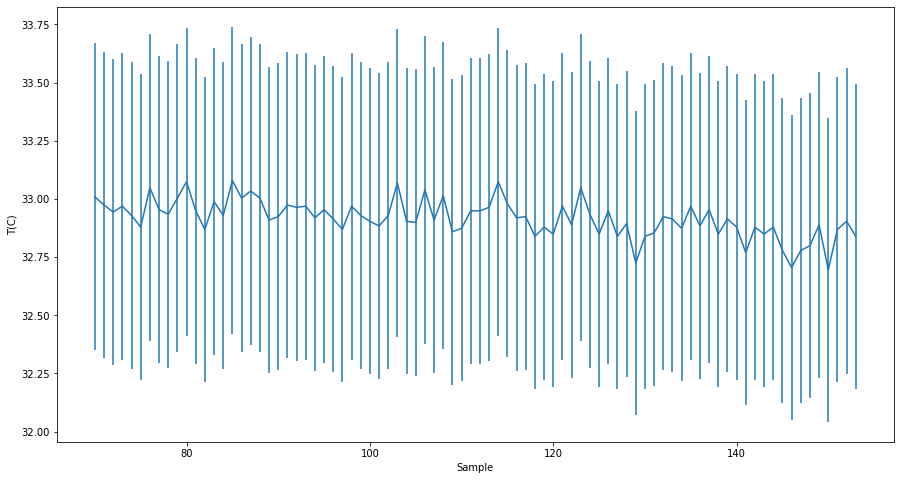

In [13]:
yerr=dfT.Tmax[70:]*0.02

meanTmax=dfT.Tmax[70:].mean(axis = 0, skipna = True)
stdTmax=dfT.Tmax[70:].std(axis = 0, skipna = True)

print('Tmax=',meanTmax,'+/-',stdTmax)   # error bar = 0.02*Tmeasure ~0.66C

plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample[70:], dfT.Tmax[70:], yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax


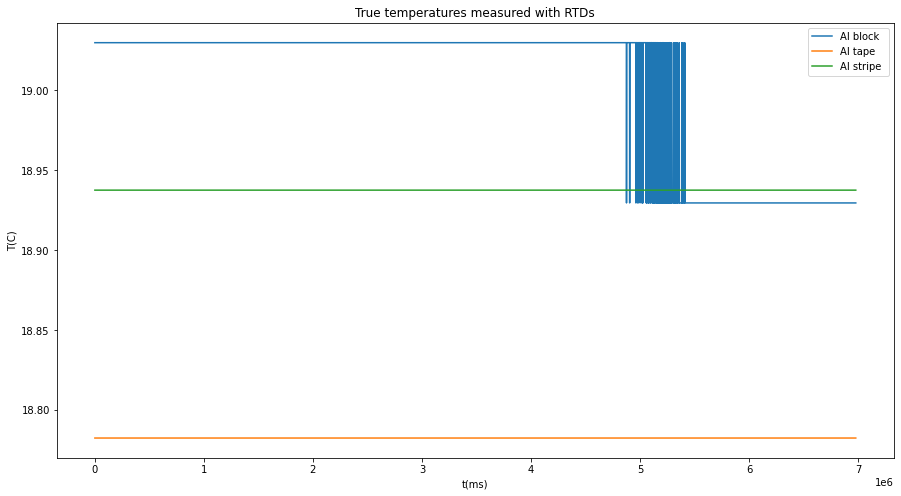

In [14]:
Temp_irc = pd.read_csv("./09_11_2020_16_55_53/test.csv",sep=",", index_col=None) # read info from csv file

t=Temp_irc.t_msec # time from start in ms 
T_ab=Temp_irc.RTD_10 # T on Al block
T_at=Temp_irc.RTD_11 # T Al tape
T_ats=Temp_irc.RTD_1 # T Al tape stripe

plt.figure(figsize=(15,8))
plt.xlabel("t(ms)")
plt.ylabel("T(C)")
plt.title('True temperatures measured with RTDs')
plt.plot(t, T_ab)
plt.plot(t, T_at)
plt.plot(t, T_ats)

plt.legend(["Al block", "Al tape","Al stripe "])

plt.show()

In [15]:
# Secon data set. each ~30 s

dft = open('datafileslens_sep11.txt', 'r')

pic=[]
label=[]
for line in dft:
    #print(line) 
    line=line.strip()
    label.append(re.findall('Tlens[0-9]+',line)) # label the file name (# of picture)  
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))

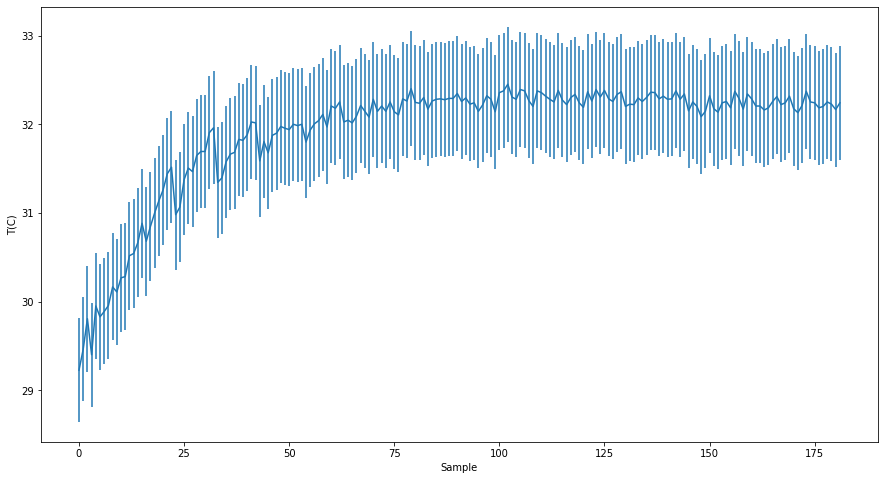

In [16]:
Tmax=[]

for i in range(0,len(pic)): 
    idx, idy =np.where(pic[i] == np.amax(pic[i]))
    Tmax.append([i,np.amax(pic[i]),idx[0],idy[0]])
    
    
dfT=pd.DataFrame(Tmax,columns= ['Sample','Tmax','px','py'])

yerr=dfT.Tmax*0.02            # E50 camera has an accuracy of +-2% of the reading (or 2 C) 
plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample, dfT.Tmax,yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax

Tmax= 32.26669642857143 +/- 0.07490195865632211


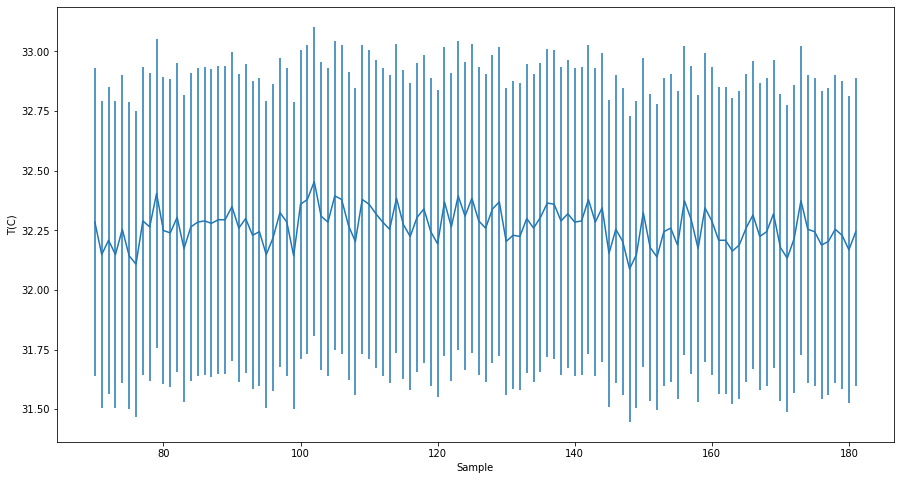

In [17]:
yerr=dfT.Tmax[70:]*0.02

meanTmax=dfT.Tmax[70:].mean(axis = 0, skipna = True)
stdTmax=dfT.Tmax[70:].std(axis = 0, skipna = True)

print('Tmax=',meanTmax,'+/-',stdTmax)   # error bar = 0.02*Tmeasure ~0.66C

plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample[70:], dfT.Tmax[70:], yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax

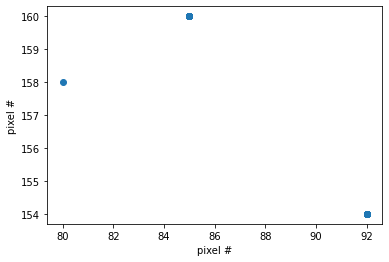

0      85
1      85
2      85
3      85
4      85
       ..
177    85
178    92
179    85
180    85
181    85
Name: px, Length: 182, dtype: int64 0      160
1      160
2      160
3      160
4      160
      ... 
177    160
178    154
179    160
180    160
181    160
Name: py, Length: 182, dtype: int64


In [18]:
plt.scatter(dfT.px,dfT.py)
#plt.plot(dfT2.idx,dfT2.py)
plt.xlabel('pixel #')
plt.ylabel('pixel #')
plt.show()
print(dfT.px,dfT.py) 

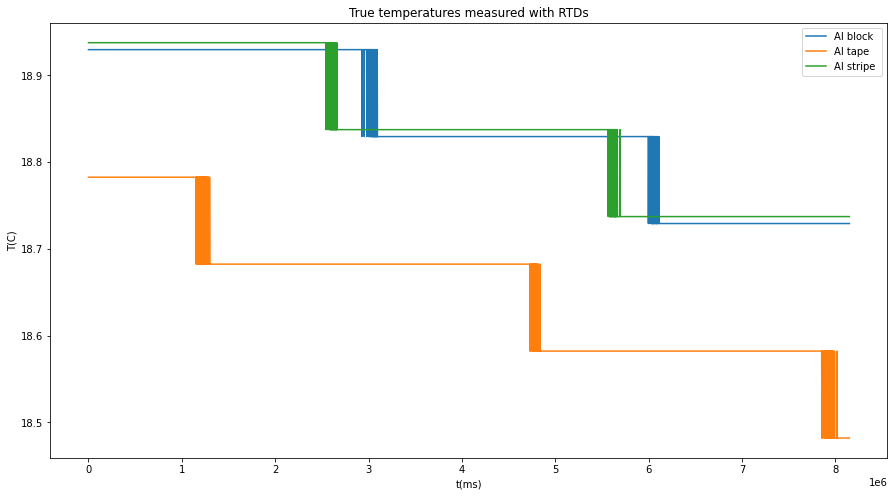

In [19]:
Temp_irc = pd.read_csv("./09_11_2020_19_00_26/test.csv",sep=",", index_col=None) # read info from csv file

t=Temp_irc.t_msec # time from start in ms 
T_ab=Temp_irc.RTD_10 # T on Al block
T_at=Temp_irc.RTD_11 # T Al tape
T_ats=Temp_irc.RTD_1 # T Al tape stripe

plt.figure(figsize=(15,8))
plt.xlabel("t(ms)")
plt.ylabel("T(C)")
plt.title('True temperatures measured with RTDs')
plt.plot(t, T_ab)
plt.plot(t, T_at)
plt.plot(t, T_ats)

plt.legend(["Al block", "Al tape","Al stripe "])

plt.show()

In [20]:
# Secon data set 

dft = open('datafileslens_sep11b.txt', 'r')

pic=[]
label=[]
for line in dft:
    #print(line) 
    line=line.strip()
    label.append(re.findall('Tlens[0-9]+',line)) # label the file name (# of picture)  
    pic.append(np.genfromtxt('.%s'%line,delimiter=','))
    

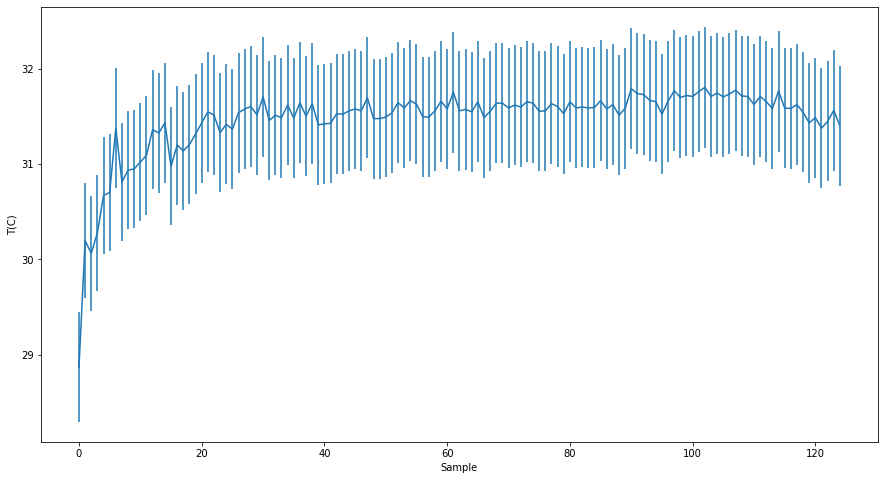

In [24]:
Tmax=[]

for i in range(0,len(pic)): 
    idx, idy =np.where(pic[i] == np.amax(pic[i]))
    Tmax.append([i,np.amax(pic[i]),idx[0],idy[0]])
    
    
dfT=pd.DataFrame(Tmax,columns= ['Sample','Tmax','px','py'])

yerr=dfT.Tmax*0.02            # E50 camera has an accuracy of +-2% of the reading (or 2 C) 
plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample, dfT.Tmax,yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax

Tmax= 31.601926315789463 +/- 0.09811253223193782


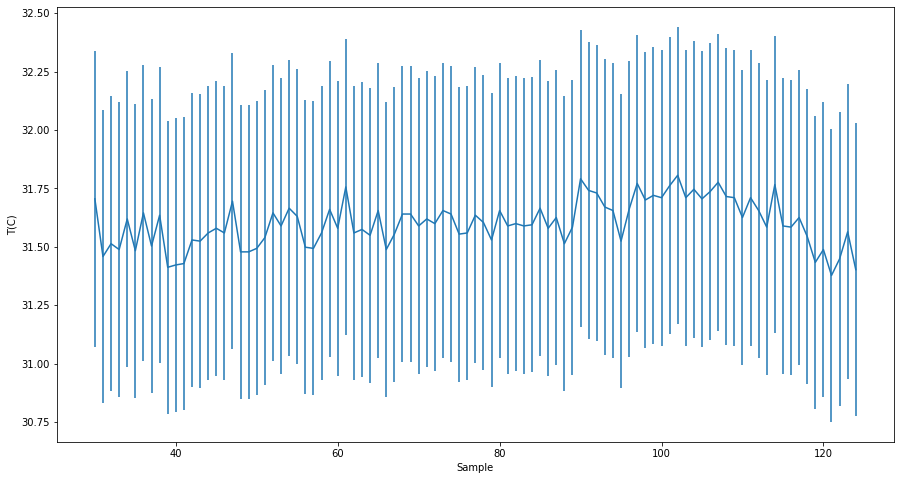

In [25]:
yerr=dfT.Tmax[30:]*0.02

meanTmax=dfT.Tmax[30:].mean(axis = 0, skipna = True)
stdTmax=dfT.Tmax[30:].std(axis = 0, skipna = True)

print('Tmax=',meanTmax,'+/-',stdTmax)   # error bar = 0.02*Tmeasure ~0.66C

plt.figure(figsize=(15,8))
plt.errorbar(dfT.Sample[30:], dfT.Tmax[30:], yerr)
plt.ylabel('T(C)')
plt.xlabel('Sample')
plt.show()
#Tmax

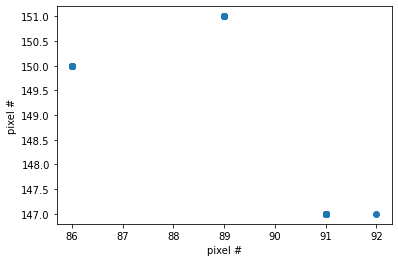

0      92
1      86
2      86
3      86
4      91
       ..
120    86
121    86
122    86
123    89
124    89
Name: px, Length: 125, dtype: int64 0      147
1      150
2      150
3      150
4      147
      ... 
120    150
121    150
122    150
123    151
124    151
Name: py, Length: 125, dtype: int64


In [26]:
plt.scatter(dfT.px,dfT.py)
#plt.plot(dfT2.idx,dfT2.py)
plt.xlabel('pixel #')
plt.ylabel('pixel #')
plt.show()
print(dfT.px,dfT.py) 

In [ ]:
# Observations: 
# 1. Hot pixel change in time but they close to each other; The camera resolution is 240x180 
# 2. The estabilization time is about 70 minutes.
# 3. Tmax after estabilization is 32.917 +/- 0.079 C while the true T is 18.85 C 